<a href="https://colab.research.google.com/github/Polutan/ml-model/blob/main/Air_Quality_Forecast_in_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Tensorflow**

In [2]:
import tensorflow as tf

## **Importing Libraries and Preparing Plot Series**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("ISPU")
  plt.grid(True)  

def avg(lst):
  average = sum(lst)/len(lst)
  return average

## **Uploading DataSet**

Source Dataset: https://data.jakarta.go.id/organization/badan-pengelolaan-lingkungan-hidup-daerah?q=ispu&sort=1

This dataset contains air pollution measurements, such as Particulate Matter (PM10), Sulfur Dioxide (SO2), Carbon Monoxide (CO), Ozone (O3), and Natrium Dioxide (NO2) from several Air Quality Monitoring Sistem (SPKU). The measurement has been converted to pollutant standards index (PSI) or Indeks Standar Pencemaran Udara (ISPU)


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Dataset/AQI_DKI_Jakarta_2010-2021.csv')
df.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,Unnamed: 10
0,2010-01-01,60,4,73,27,14,73,CO,SEDANG,DKI1,NaN
1,2010-01-02,32,2,16,33,9,33,O3,BAIK,DKI1,NaN
2,2010-01-03,27,2,19,20,9,27,PM10,BAIK,DKI1,NaN
3,2010-01-04,22,2,16,15,6,22,PM10,BAIK,DKI1,NaN
4,2010-01-05,25,2,17,15,8,25,PM10,BAIK,DKI1,NaN


## **Preprocessing Data**

In [7]:
new_data = []
for index,data in enumerate(df['max']):
  new_data.append([index+1,data])

In [8]:
new_df = pd.DataFrame(new_data, columns = ['No', 'Max'])
new_df

,No,Max
0,1,73
1,2,33
2,3,27
3,4,22
4,5,25
5,6,30
6,7,41
7,8,64
8,9,55
9,10,34


In [9]:
jumlah = len(new_df)
jumlah

4363

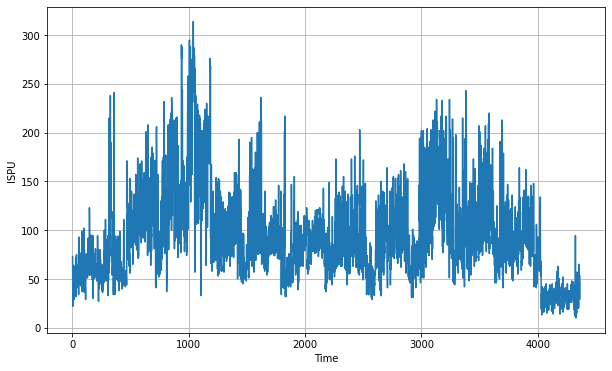

In [10]:
mean = new_df['Max'].mean()
new_df['Max'] = new_df['Max'].replace(0, mean)
for data in new_df['Max']:
  if data < 10:
    new_df['Max'] = new_df['Max'].replace(data, mean)

time = np.array(new_df['No'].values.tolist())
series = np.array(new_df['Max'].values.tolist())

plt.figure(figsize=(10, 6))
plot_series(time, series)

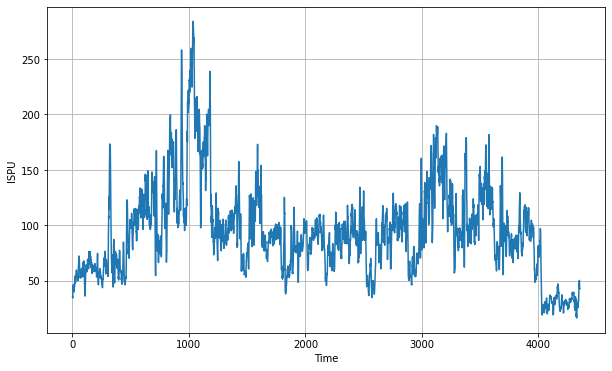

In [11]:
series_averages_window = 7
i = 0

series_moving_averages = []
while i < len(series) - series_averages_window + 1:
  window_average = round(np.sum(series[i:i+series_averages_window]) / series_averages_window, 2)
  series_moving_averages.append(window_average)
  i += 1

moving_averages_time = time[:4357]
moving_averages_series = np.array(series_moving_averages)

plt.figure(figsize=(10, 6))
plot_series(moving_averages_time, moving_averages_series)



In [12]:
print(moving_averages_time.shape)
print(moving_averages_series.shape)

(4357,)
(4357,)


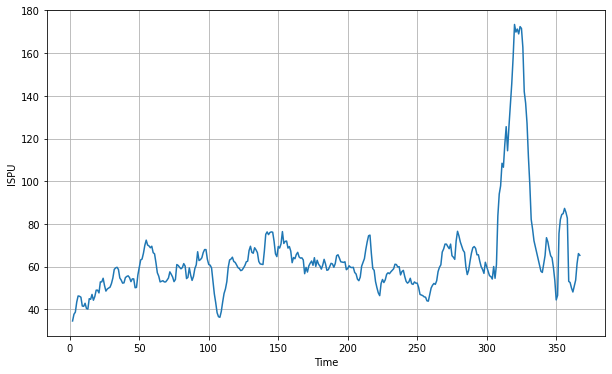

In [13]:
def zoomed_plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[1:367], series[1:367], format)
  plt.xlabel("Time")
  plt.ylabel("ISPU")
  plt.grid(True) 

plt.figure(figsize=(10, 6))
zoomed_plot_series(moving_averages_time, moving_averages_series)

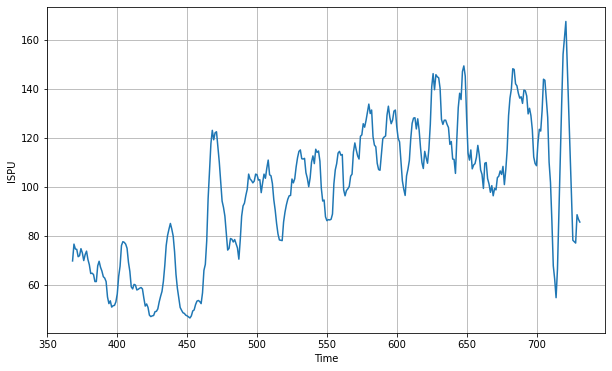

In [14]:
def zoomed_plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[367:731], series[367:731], format)
  plt.xlabel("Time")
  plt.ylabel("ISPU")
  plt.grid(True) 

plt.figure(figsize=(10, 6))
zoomed_plot_series(moving_averages_time, moving_averages_series)

## **Preparing Dataset for Training and Testing**

In [15]:
split_time = int(0.9 * jumlah)
time_train = moving_averages_time[:split_time]
x_train = moving_averages_series[:split_time]
time_valid = moving_averages_time[split_time:]
x_valid = moving_averages_series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [16]:
print(time_train.shape)
print(x_train.shape)
print(time_valid.shape)
print(x_valid.shape)

(3926,)
(3926,)
(431,)
(431,)


## **Windowing Dataset**

In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

## **Training The Dataset**

**Training to find the best learning rate**

In [49]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

model.summary()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20)
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_12 (Lambda)          (None, 30, 1)             0         
                                                                 
 lstm_12 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
 lambda_13 (Lambda)          (None, 1)                 0         
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9))


In [51]:
history = model.fit(dataset,epochs=100,callbacks = [lr_schedule])


Epoch 1/100
122/122 [==============================] - 4s 9ms/step - loss: 63.8605 - lr: 1.0000e-08
Epoch 2/100
122/122 [==============================] - 1s 9ms/step - loss: 56.2161 - lr: 1.1220e-08
Epoch 3/100
122/122 [==============================] - 1s 9ms/step - loss: 48.3478 - lr: 1.2589e-08
Epoch 4/100
122/122 [==============================] - 1s 9ms/step - loss: 40.8650 - lr: 1.4125e-08
Epoch 5/100
122/122 [==============================] - 1s 9ms/step - loss: 34.7202 - lr: 1.5849e-08
Epoch 6/100
122/122 [==============================] - 1s 9ms/step - loss: 30.4748 - lr: 1.7783e-08
Epoch 7/100
122/122 [==============================] - 1s 9ms/step - loss: 27.6729 - lr: 1.9953e-08
Epoch 8/100
122/122 [==============================] - 1s 9ms/step - loss: 25.8925 - lr: 2.2387e-08
Epoch 9/100
122/122 [==============================] - 1s 9ms/step - loss: 24.7795 - lr: 2.5119e-08
Epoch 10/100
122/122 [==============================] - 1s 9ms/step - loss: 24.0893 - lr: 2.8184e-08

(1e-08, 0.001, 0.0, 100.0)

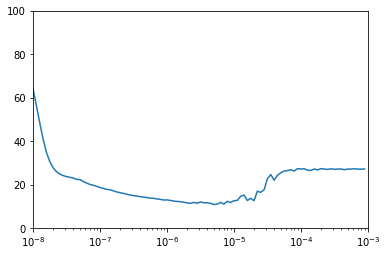

In [52]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1e-3, 0, 100])

**Training the model**



In [53]:
dataset = windowed_dataset(x_train, window_size, 16, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400.0)
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), metrics=["mae"])
history = model.fit(dataset,epochs=100)

Epoch 1/100
244/244 [==============================] - 6s 9ms/step - loss: 18.3716 - mae: 18.8642
Epoch 2/100
244/244 [==============================] - 2s 9ms/step - loss: 13.6275 - mae: 14.1189
Epoch 3/100
244/244 [==============================] - 2s 9ms/step - loss: 12.0942 - mae: 12.5839
Epoch 4/100
244/244 [==============================] - 2s 9ms/step - loss: 11.4561 - mae: 11.9461
Epoch 5/100
244/244 [==============================] - 2s 8ms/step - loss: 11.7843 - mae: 12.2736
Epoch 6/100
244/244 [==============================] - 2s 9ms/step - loss: 11.2004 - mae: 11.6878
Epoch 7/100
244/244 [==============================] - 2s 8ms/step - loss: 10.5137 - mae: 11.0033
Epoch 8/100
244/244 [==============================] - 2s 8ms/step - loss: 11.0948 - mae: 11.5838
Epoch 9/100
244/244 [==============================] - 2s 8ms/step - loss: 9.4726 - mae: 9.9592
Epoch 10/100
244/244 [==============================] - 2s 9ms/step - loss: 9.3638 - mae: 9.8499
Epoch 11/100
244/244 [=

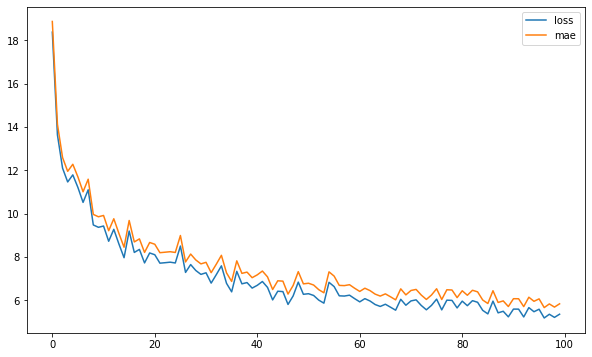

In [54]:
pd.DataFrame(history.history).plot(figsize=(10,6))

## **Forecasting**

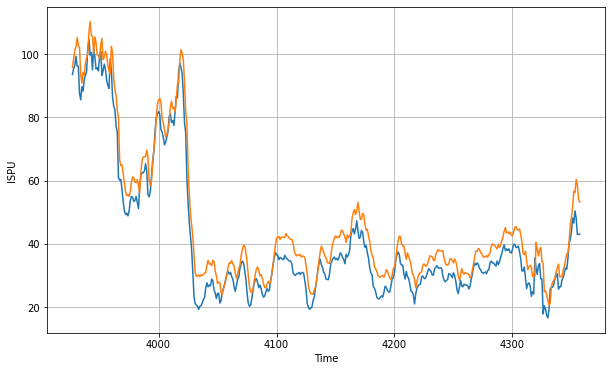

In [55]:
forecast=[]
for moving_averages_time in range(len(moving_averages_series) - window_size):
  forecast.append(model.predict(moving_averages_series[moving_averages_time:moving_averages_time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

## **Mean Absolute Error**

In [56]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.261293

# **Predict**

In [57]:
print(moving_averages_series[700:730])
model.predict(moving_averages_series[700:730][np.newaxis])

[117.71 123.43 122.71 131.   143.86 143.43 136.   128.29 110.   101.71
  86.    67.71  62.29  54.71  66.43  89.   112.43 133.71 154.   160.57
 167.43 149.86 132.71 114.86  96.71  78.14  77.57  77.    88.57  86.71]


array([[88.3499]], dtype=float32)

In [ ]:
model.save("AQI_Forecast_V1_Model.h5")